In [120]:
import pandas as pd
import numpy as np

In [121]:
df = pd.read_csv("data\hospital_readmissions - hospital_readmissions.csv", index_col=None)
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [122]:
df.readmitted = df.readmitted.apply(lambda x: 1 if x == 'yes' else 0)
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,0
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,0
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,1
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,1
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,0


In [123]:
df.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,readmitted
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600,0.470160
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873,0.499119
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000,1.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000,1.000000


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  int64

In [125]:
def return_non_int_cols(df):
    return [col for col in df.columns if df[col].dtype != 'int64']

In [126]:
non_int_cols = return_non_int_cols(df)
non_int_cols

['age',
 'medical_specialty',
 'diag_1',
 'diag_2',
 'diag_3',
 'glucose_test',
 'A1Ctest',
 'change',
 'diabetes_med']

In [127]:
unique_dict = dict()
for unique_col in non_int_cols:
    unique_dict[unique_col] = list(sorted(df[unique_col].unique()))
    

In [128]:
print(unique_dict)

{'age': ['[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)'], 'medical_specialty': ['Cardiology', 'Emergency/Trauma', 'Family/GeneralPractice', 'InternalMedicine', 'Missing', 'Other', 'Surgery'], 'diag_1': ['Circulatory', 'Diabetes', 'Digestive', 'Injury', 'Missing', 'Musculoskeletal', 'Other', 'Respiratory'], 'diag_2': ['Circulatory', 'Diabetes', 'Digestive', 'Injury', 'Missing', 'Musculoskeletal', 'Other', 'Respiratory'], 'diag_3': ['Circulatory', 'Diabetes', 'Digestive', 'Injury', 'Missing', 'Musculoskeletal', 'Other', 'Respiratory'], 'glucose_test': ['high', 'no', 'normal'], 'A1Ctest': ['high', 'no', 'normal'], 'change': ['no', 'yes'], 'diabetes_med': ['no', 'yes']}


In [129]:
ordinal_encoding = []
onehot_encoding = []

for key, value in unique_dict.items():
    if len(value)> 2:
        # print(key, value)
        ordinal_encoding.append(key)
    if len(value) <= 2:
        # print(key, value)
        onehot_encoding.append(key)

print(f"The columns for ordinal encoding are: {ordinal_encoding} \nThe columns for one hot encoding are: {onehot_encoding}")

The columns for ordinal encoding are: ['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test', 'A1Ctest'] 
The columns for one hot encoding are: ['change', 'diabetes_med']


In [130]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
encoded_data_ordinal = ordinal_encoder.fit_transform(df[ordinal_encoding])

encoded_data_onehot = pd.get_dummies(df[onehot_encoding], dtype=int, drop_first=True)

df[ordinal_encoding] = encoded_data_ordinal
df[onehot_encoding] = encoded_data_onehot

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                25000 non-null  float64
 1   time_in_hospital   25000 non-null  int64  
 2   n_lab_procedures   25000 non-null  int64  
 3   n_procedures       25000 non-null  int64  
 4   n_medications      25000 non-null  int64  
 5   n_outpatient       25000 non-null  int64  
 6   n_inpatient        25000 non-null  int64  
 7   n_emergency        25000 non-null  int64  
 8   medical_specialty  25000 non-null  float64
 9   diag_1             25000 non-null  float64
 10  diag_2             25000 non-null  float64
 11  diag_3             25000 non-null  float64
 12  glucose_test       25000 non-null  float64
 13  A1Ctest            25000 non-null  float64
 14  change             25000 non-null  int32  
 15  diabetes_med       25000 non-null  int32  
 16  readmitted         250

In [132]:
from sklearn.preprocessing import StandardScaler

cols = list(df.columns)
cols.remove('readmitted')
cols

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop('readmitted', axis=1))

In [133]:
df_scaled_data = pd.DataFrame(scaled_data, columns=cols)
df_scaled_data

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med
0,0.498538,1.181671,1.451151,-0.205440,0.216814,1.366510,-0.522918,-0.210644,0.379678,-1.165984,1.258116,1.006767,-0.000512,0.159989,-0.923181,0.547893
1,0.498538,-0.484212,-0.466276,0.377601,-0.403505,-0.306494,-0.522918,-0.210644,1.081225,0.955864,0.914882,1.006767,-0.000512,0.159989,-0.923181,0.547893
2,-1.021673,0.182141,0.088769,-0.788481,0.216814,-0.306494,-0.522918,-0.210644,0.379678,-1.165984,-1.144519,-1.108023,-0.000512,0.159989,1.083211,0.547893
3,0.498538,-0.817389,-0.365359,-0.788481,-0.527569,0.530008,-0.522918,-0.210644,0.379678,-1.165984,0.914882,-0.755558,-0.000512,0.159989,1.083211,0.547893
4,-0.261568,-1.150566,-0.062607,-0.788481,-1.147888,-0.306494,-0.522918,-0.210644,-0.321870,0.955864,-1.144519,1.359232,-0.000512,0.159989,-0.923181,0.547893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1.258643,3.180732,1.703444,-0.205440,1.705579,-0.306494,-0.522918,-0.210644,0.379678,-1.165984,0.914882,-1.108023,-0.000512,2.672387,-0.923181,-1.825172
24996,1.258643,-0.817389,1.148400,-0.788481,0.961196,-0.306494,-0.522918,-0.210644,0.379678,-0.458701,-0.114818,1.006767,-0.000512,-2.352408,1.083211,0.547893
24997,0.498538,0.182141,-1.576365,-0.788481,-1.271951,-0.306494,0.326030,-0.210644,0.379678,0.955864,0.914882,1.006767,4.263503,0.159989,-0.923181,-1.825172
24998,0.498538,-0.817389,0.896107,0.960642,-0.155377,-0.306494,-0.522918,-0.210644,-1.023418,1.309505,-0.801286,1.006767,-0.000512,0.159989,1.083211,0.547893


<Axes: >

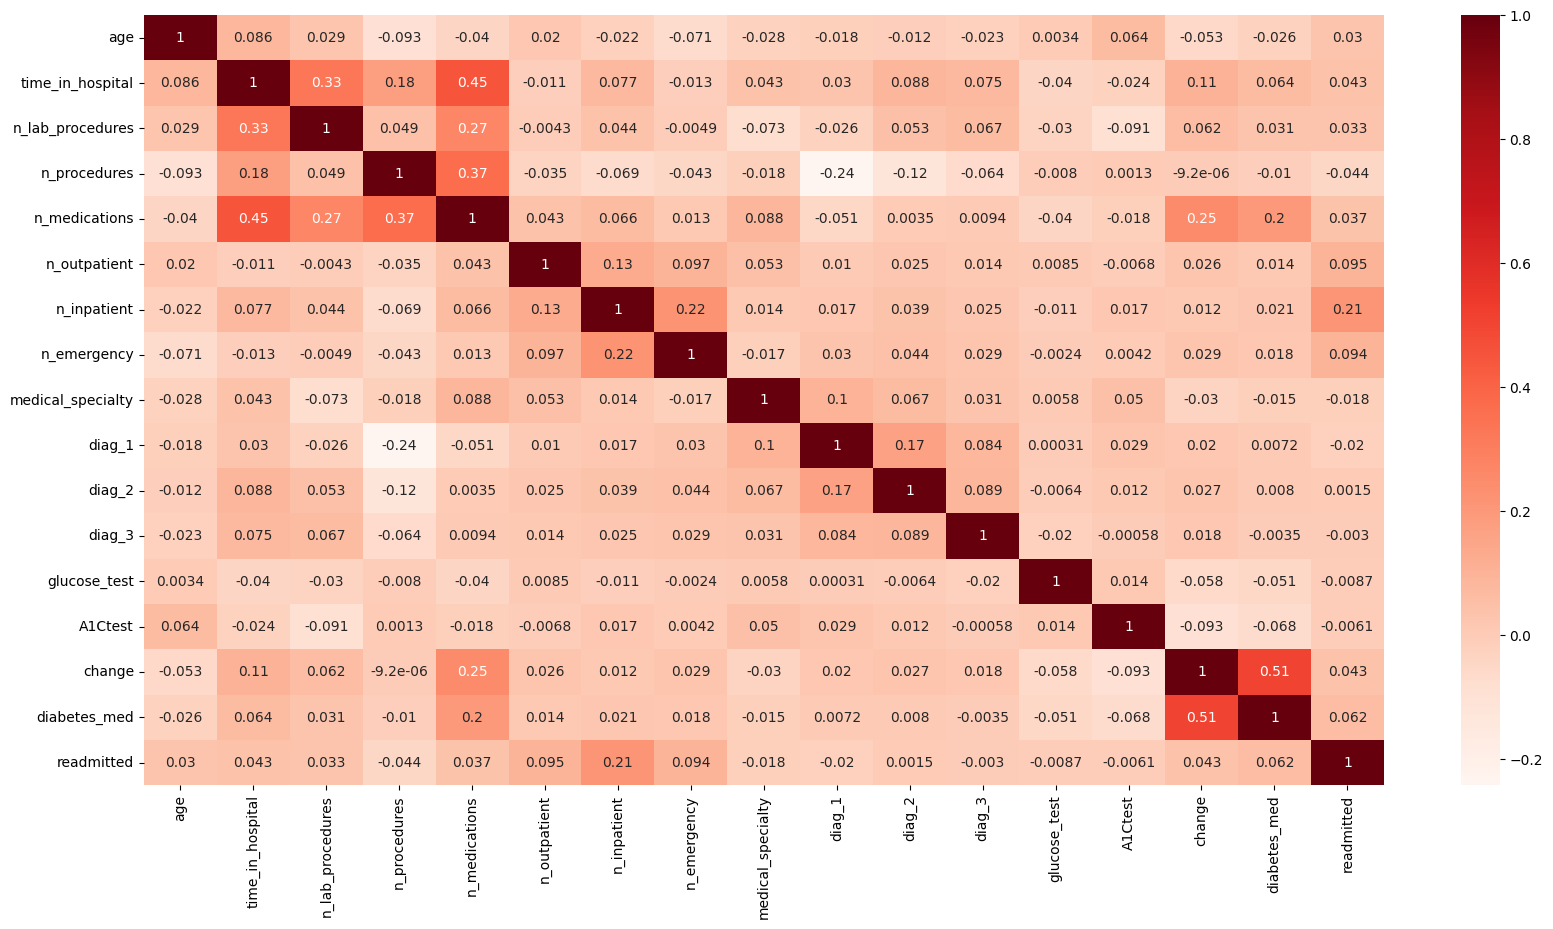

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

df_scaled_data['readmitted'] = df['readmitted']

plt.figure(figsize=(20,10))
sns.heatmap(df_scaled_data.corr(), annot=True, cmap='Reds')

# It looks like most of the features are are not related to the output variables

In [135]:
df_scaled_data

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,0.498538,1.181671,1.451151,-0.205440,0.216814,1.366510,-0.522918,-0.210644,0.379678,-1.165984,1.258116,1.006767,-0.000512,0.159989,-0.923181,0.547893,0
1,0.498538,-0.484212,-0.466276,0.377601,-0.403505,-0.306494,-0.522918,-0.210644,1.081225,0.955864,0.914882,1.006767,-0.000512,0.159989,-0.923181,0.547893,0
2,-1.021673,0.182141,0.088769,-0.788481,0.216814,-0.306494,-0.522918,-0.210644,0.379678,-1.165984,-1.144519,-1.108023,-0.000512,0.159989,1.083211,0.547893,1
3,0.498538,-0.817389,-0.365359,-0.788481,-0.527569,0.530008,-0.522918,-0.210644,0.379678,-1.165984,0.914882,-0.755558,-0.000512,0.159989,1.083211,0.547893,1
4,-0.261568,-1.150566,-0.062607,-0.788481,-1.147888,-0.306494,-0.522918,-0.210644,-0.321870,0.955864,-1.144519,1.359232,-0.000512,0.159989,-0.923181,0.547893,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1.258643,3.180732,1.703444,-0.205440,1.705579,-0.306494,-0.522918,-0.210644,0.379678,-1.165984,0.914882,-1.108023,-0.000512,2.672387,-0.923181,-1.825172,1
24996,1.258643,-0.817389,1.148400,-0.788481,0.961196,-0.306494,-0.522918,-0.210644,0.379678,-0.458701,-0.114818,1.006767,-0.000512,-2.352408,1.083211,0.547893,1
24997,0.498538,0.182141,-1.576365,-0.788481,-1.271951,-0.306494,0.326030,-0.210644,0.379678,0.955864,0.914882,1.006767,4.263503,0.159989,-0.923181,-1.825172,1
24998,0.498538,-0.817389,0.896107,0.960642,-0.155377,-0.306494,-0.522918,-0.210644,-1.023418,1.309505,-0.801286,1.006767,-0.000512,0.159989,1.083211,0.547893,0


In [136]:
list_of_truly_useful_cols_scaled= []

for col in df_scaled_data.corr().index:
    value = float(df_scaled_data.corr().iloc[-1][col])
    if value > 0.09:
        list_of_truly_useful_cols_scaled.append(col)

list_of_truly_useful_cols_scaled

['n_outpatient', 'n_inpatient', 'n_emergency', 'readmitted']

In [137]:
df_truly_useful = df_scaled_data[list_of_truly_useful_cols_scaled]

<Axes: >

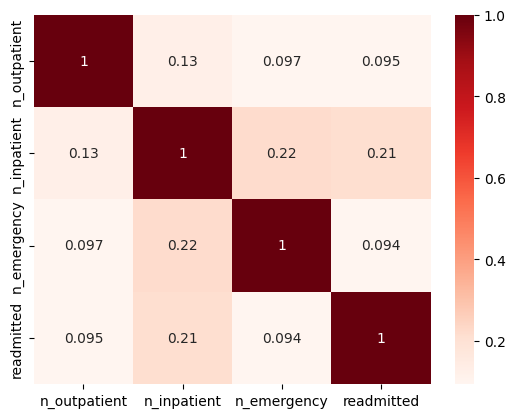

In [138]:
sns.heatmap(df_truly_useful.corr(), annot=True, cmap='Reds')

<Axes: xlabel='n_outpatient', ylabel='readmitted'>

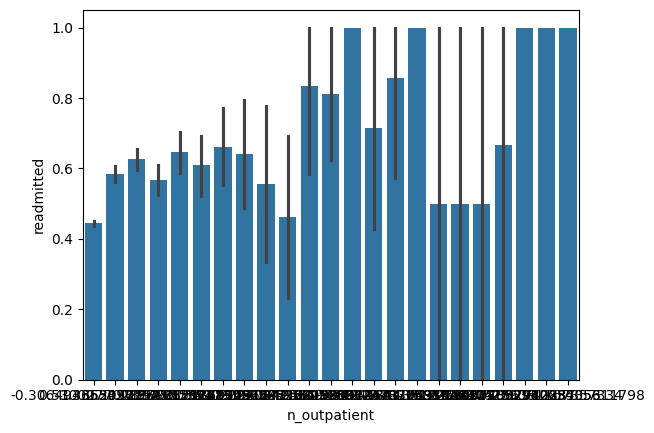

In [139]:
sns.barplot(x=df_truly_useful.n_outpatient, y=df.readmitted)

<Axes: xlabel='n_outpatient', ylabel='readmitted'>

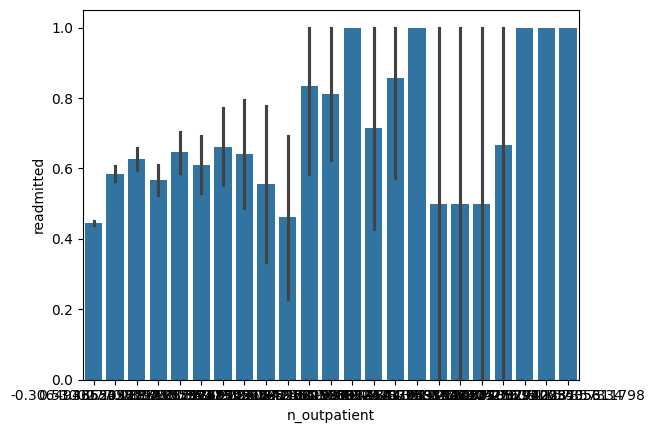

In [140]:
sns.barplot(x=df_truly_useful.n_outpatient, y=df.readmitted)

Let's check if there is any multicollinearity in our dataset or not 

In [141]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_truly_useful.values, i) for i in range(df_truly_useful.shape[1])]
vif["features"] = df_truly_useful.columns
vif


,VIF Factor,features
0,1.024151,n_outpatient
1,1.084329,n_inpatient
2,1.057408,n_emergency
3,1.028195,readmitted


In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_truly_useful.drop('readmitted', axis=1), df_truly_useful['readmitted'], test_size=0.2, random_state=42)

In [143]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear',verbose=10)
lr.fit(X_train, y_train)

[LibLinear]

LogisticRegression(solver='liblinear', verbose=10)

In [144]:
print(f"The Trainging Accuracy is: {lr.score(X_train, y_train)} \nThe Testing Accuracy is: {lr.score(X_test, y_test)}")

The Trainging Accuracy is: 0.6005 
The Testing Accuracy is: 0.607


In [145]:
y_pred = lr.predict(X_test)

print(f"Predictions: {y_pred}")

Predictions: [1 0 0 ... 1 0 0]


In [146]:
from sklearn.metrics import confusion_matrix, classification_report

In [147]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.86      0.70      2658
           1       0.67      0.32      0.43      2342

    accuracy                           0.61      5000
   macro avg       0.63      0.59      0.57      5000
weighted avg       0.63      0.61      0.58      5000



Confusion Matrix

<Axes: >

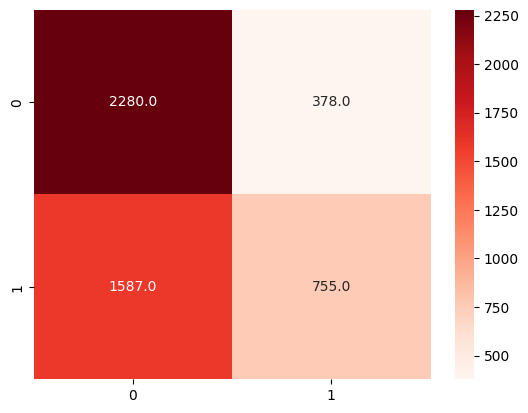

In [148]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.1f', cmap='Reds')

Visualization

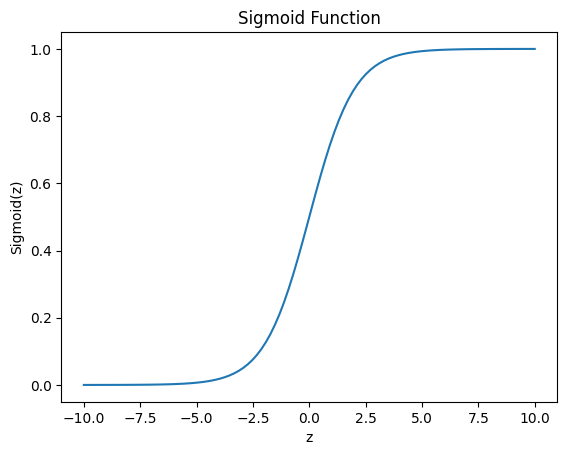

In [149]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
plt.plot(z, sigmoid(z))
plt.xlabel('z')
plt.ylabel('Sigmoid(z)')
plt.title('Sigmoid Function')
plt.show()


In [157]:
sigmoid_records = X_train.sample(100)


,n_outpatient,n_inpatient,n_emergency
21185,-0.306494,0.326030,-0.210644
4665,-0.306494,-0.522918,-0.210644
10304,0.530008,1.174979,0.918208
22366,-0.306494,-0.522918,0.918208
6594,-0.306494,-0.522918,-0.210644
...,...,...,...
1143,-0.306494,-0.522918,-0.210644
5737,-0.306494,1.174979,-0.210644
15330,-0.306494,-0.522918,-0.210644
16484,-0.306494,-0.522918,0.918208


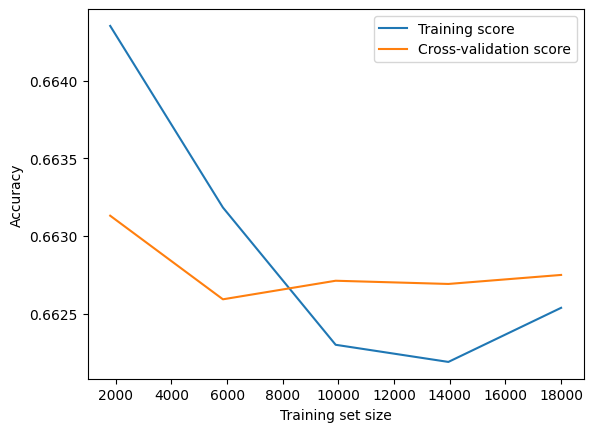

In [150]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(lr, X_train, y_train, cv=10, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5), scoring="neg_log_loss")

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

ROC

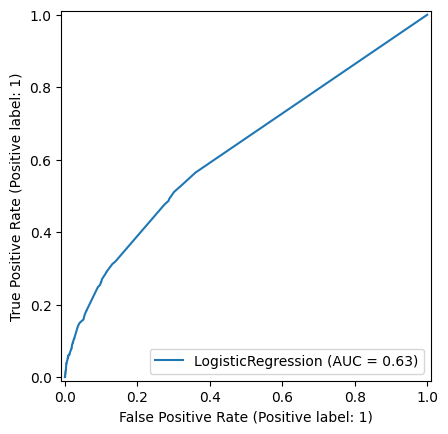

In [151]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(lr, X_test, y_test)

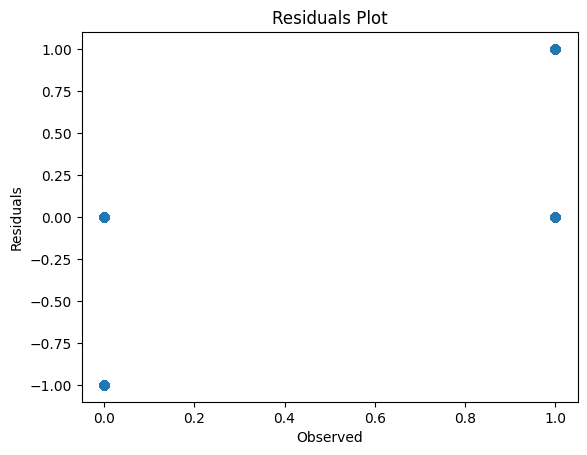

In [152]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.xlabel('Observed')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


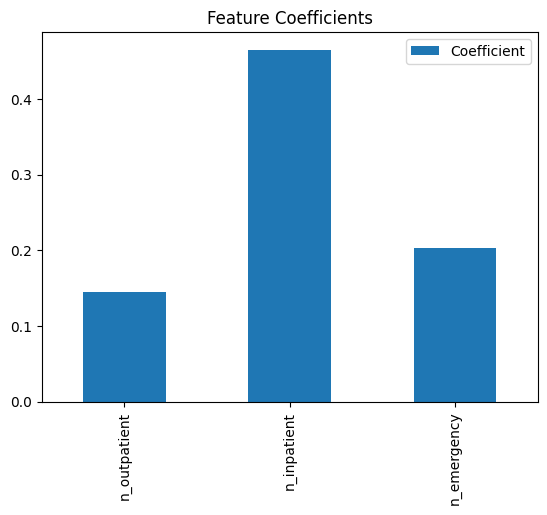

In [153]:
coefficients = pd.DataFrame(lr.coef_.flatten(), X_train.columns, columns=['Coefficient'])
# print(coefficients)

coefficients.plot(kind='bar')
plt.title('Feature Coefficients')
plt.show()